In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, BatchNormalization, MaxPool2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

In [28]:
test_dir="../input/cat-and-dog/test_set/test_set"
train_dir="../input/cat-and-dog/training_set/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [29]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4001
number of dogs training images -  4006
number of cats testing images -  1012
number of dogs testing images -  1013


In [30]:
data_generator = ImageDataGenerator(rescale = 1.0 / 255.0, zoom_range = 0.2)

In [53]:
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64,64),
                                                   batch_size = 32, 
                                                   class_mode = 'binary')

testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
len(training_data)

In [32]:
training_data.image_shape

(64, 64, 3)

In [85]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5), padding = 'same' ,activation = 'relu',  input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (5,5), padding = 'same' ,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (5,5), padding = 'same' ,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation = 'softmax'))                 # 2, bcoz we have 2 classes i.e, dogs and cats

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics = [keras.metrics.CategoricalAccuracy()])

In [86]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
batch_normalization_34 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 64)        51264     
_________________________________________________________________
batch_normalization_35 (Batc (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)        

In [89]:
fitted_model = model.fit_generator(training_data,
                                   steps_per_epoch = len(training_data) // 32,
                                   epochs = 50,
                                   validation_data = testing_data,
                                   validation_steps=len(testing_data) // 32,
                                   verbose = 2)

Epoch 1/50
7/7 - 1s - loss: 0.6339 - categorical_accuracy: 0.6429 - val_loss: 1.0675 - val_categorical_accuracy: 1.0000
Epoch 2/50
7/7 - 1s - loss: 0.6289 - categorical_accuracy: 0.4688 - val_loss: 1.2657 - val_categorical_accuracy: 0.9531
Epoch 3/50
7/7 - 1s - loss: 0.6532 - categorical_accuracy: 0.3661 - val_loss: 0.9620 - val_categorical_accuracy: 0.8750
Epoch 4/50
7/7 - 1s - loss: 0.6101 - categorical_accuracy: 0.4911 - val_loss: 0.7770 - val_categorical_accuracy: 0.8594
Epoch 5/50
7/7 - 1s - loss: 0.6418 - categorical_accuracy: 0.5938 - val_loss: 0.7159 - val_categorical_accuracy: 0.6250
Epoch 6/50
7/7 - 1s - loss: 0.6438 - categorical_accuracy: 0.5580 - val_loss: 0.9547 - val_categorical_accuracy: 1.0000
Epoch 7/50
7/7 - 1s - loss: 0.6050 - categorical_accuracy: 0.5982 - val_loss: 1.3728 - val_categorical_accuracy: 0.9688
Epoch 8/50
7/7 - 1s - loss: 0.6226 - categorical_accuracy: 0.5533 - val_loss: 0.9181 - val_categorical_accuracy: 1.0000
Epoch 9/50
7/7 - 1s - loss: 0.6052 - cat

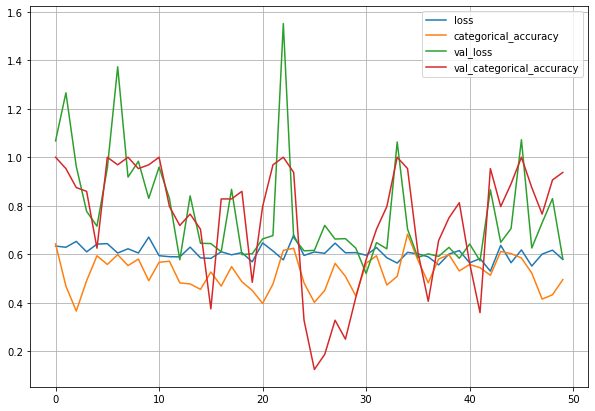

In [90]:
pd.DataFrame(fitted_model.history).plot(figsize = (10,7))
plt.gca()
plt.grid(True)
plt.show()

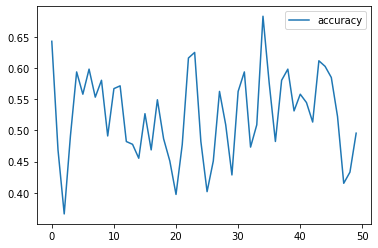

In [91]:
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label = 'accuracy')
plt.legend()

In [98]:
from tensorflow.keras.preprocessing import image
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [105]:
print(testing_image(test_dir + '/dogs/dog.4006.jpg'))

[[1. 0.]]
Dog


In [106]:
print(testing_image(test_dir + '/cats/cat.4006.jpg'))

[[1.6489195e-11 1.0000000e+00]]
Cat
